## **06-03 선형 회귀(Linear Regression)**

딥 러닝을 이해하기 위해서는 선형 회귀(Linear Regression)와 로지스틱 회귀(Logsitic Regression)를 이해할 필요가 있습니다. 이번 챕터에서는 머신 러닝에서 쓰이는 용어인 가설(Hypothesis), 손실 함수(Loss Function) 그리고 경사 하강법(Gradient Descent)에 대한 개념과 선형 회귀에 대해서 이해합니다.

### **1. 선형 회귀(Linear Regression)**

시험 공부하는 시간을 늘리면 늘릴 수록 성적이 잘 나옵니다. 하루에 걷는 횟수를 늘릴 수록, 몸무게는 줄어듭니다. 집의 평수가 클수록, 집의 매매 가격은 비싼 경향이 있습니다. 이는 수학적으로 생각해보면 어떤 요인의 수치에 따라서 특정 요인의 수치가 영향을 받고있다고 말할 수 있습니다. 조금 더 수학적인 표현을 써보면 어떤 변수의 값에 따라서 특정 변수의 값이 영향을 받고 있다고 볼 수 있습니다. 다른 변수의 값을 변하게하는 변수를 $x$, 변수 $x$에 의해서 값이 종속적으로 변하는 변수 $y$라고 해봅시다.

이때 변수 $x$의 값은 독립적으로 변할 수 있는 것에 반해, $y$값은 계속해서 $x$의 값에 의해서, 종속적으로 결정되므로 $x$를 독립 변수, $y$를 종속 변수라고도 합니다. 선형 회귀는 한 개 이상의 독립 변수 $x$와 $y$의 선형 관계를 모델링합니다. 만약, 독립 변수 $x$가 1개라면 **단순 선형 회귀** 라고 합니다.

#### **1) 단순 선형 회귀 분석(Simple Linear Regression Analysis)**

위의 수식은 단순 선형 회귀의 수식을 보여줍니다. 여기서 독립 변수 $x$와 곱해지는 값 $w$를 머신 러닝에서는 가중치(weight), 별도로 더해지는 값 $b$를 편향(bias)이라고 합니다. 직선의 방정식에서는 각각 직선의 기울기와 절편을 의미합니다. $w$와 $b$가 없이 $y$와 $x$란 수식은 $y$는 $x$와 같다는 하나의 식밖에 표현하지 못합니다. 그래프 상으로 말하면 하나의 직선밖에 표현하지 못합니다.

$$y = {x}$$

다시 말해 $w$와 $b$의 값에 따라서 $x$와 $y$가 표현하는 직선은 무궁무진해집니다.

#### **2) 다중 선형 회귀 분석(Multiple Linear Regression Analysis)**

$$y = {wx + b}$$

집의 매매 가격은 단순히 집의 평수가 크다고 결정되는 게 아니라 집의 층의 수, 방의 개수, 지하철 역과의 거리와도 영향이 있습니다. 이러한 다수의 요소를 가지고 집의 매매 가격을 예측해보고 싶습니다. $y$는 여전히 1개이지만 이제 $x$는 1개가 아니라 여러 개가 되었습니다. 이를 다중 선형 회귀 분석이라고 합니다. 이에 대한 실습은 뒤에서 진행합니다.

#### **2. 가설(Hypothesis) 세우기**

**단순 선형 회귀** 를 가지고 문제를 풀어봅시다. 어떤 학생의 공부 시간에 따라서 다음과 같은 점수를 얻었다는 데이터가 있습니다.


| hours($x$) |	score($y$) |
| --- | --- |
| 2	|   25 |
| 3	| 50 |
| 4	| 42 |
| 5	| 61 |

이를 좌표 평면에 그려보면 다음과 같습니다.

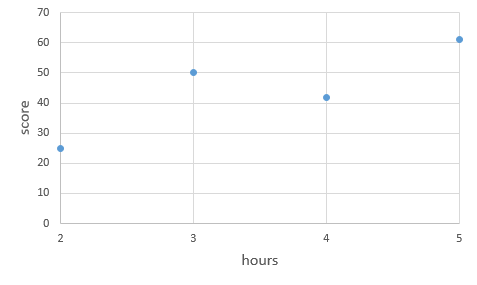

알고있는 데이터로부터 $x$와 $y$의 관계를 유추하고, 이 학생이 6시간, 7시간, 8시간을 공부하였을 때의 성적을 예측해보고 싶습니다. $x$와 $y$의 관계를 유추하기 위해서 수학적으로 식을 세워보게 되는데 머신 러닝에서는 이러한 식을 가설(Hypothesis) 이라고 합니다. 아래의 $H(x)$에서 $H$는 Hypothesis를 의미합니다.

$$H(x) = {wx + b}$$

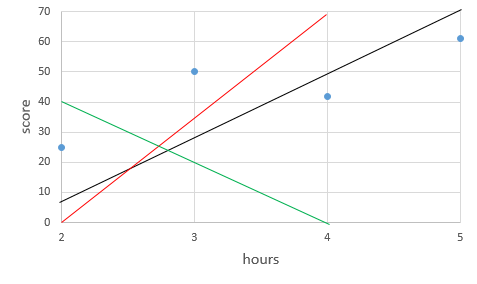

위의 그림은 $w$와 $b$의 값에 따라서 천차만별로 그려지는 직선의 모습을 보여줍니다. 중학교 수학 과정인 직선의 방정식을 알고있다면, 위의 가설에서 $w$는 직선의 기울기이고 $b$는 절편으로 직선을 표현함을 알 수 있습니다. 결국 선형 회귀는 주어진 데이터로부터 $y$와 $x$의 관계를 가장 잘 나타내는 직선을 그리는 일을 말합니다. 그리고 어떤 직선인지 결정하는 것은 $w$와 $b$의 값이므로 선형 회귀에서 해야할 일은 결국 적절한 $w$와 $b$를 찾아내는 일이 됩니다.

아직은 방법을 모르지만, 어떤 방법을 사용하여 적절한 $w$와 $b$의 값을 찾은 덕택에 $y$와 $x$의 관계를 가장 잘 나타내는 직선을 위의 좌표 평면 상에서 그렸다고 한 번 가정해보겠습니다. 이 직선을 $x$가 6일때, 7일때, 8일때에 대해서도 계속해서 직선을 그저 이어그린다면 이 학생이 6시간을 공부했을 때, 7시간을 공부했을 때, 8시간을 공부했을 때의 예상 점수를 말할 수 있게 됩니다. 그저 $x$가 각각 6일 때, 7일 때, 8일 때의 $y$ 값을 확인하면 되기 때문입니다.

### **3. 비용 함수(Cost function) : 평균 제곱 오차(MSE)**

앞서 주어진 데이터에서 $x$와 $y$의 관계를 $w$와 $b$를 이용하여 식을 세우는 일을 가설이라고 언급했습니다. 그리고 이제 해야할 일은 문제에 대한 규칙을 가장 잘 표현하는 $w$와 $b$를 찾는 일입니다. 머신 러닝은 $w$와 $b$를 찾기 위해서 실제값과 가설로부터 얻은 예측값의 오차를 계산하는 식을 세우고, 이 식의 값을 최소화하는 최적의 $w$와 $b$를 찾아냅니다.

이때 실제값과 예측값에 대한 오차에 대한 식을 **목적 함수(Objective function)** 또는 **비용 함수(Cost function)** 또는 **손실 함수(Loss function)** 라고 합니다. 함수의 값을 최소화하거나, 최대화하거나 하는 목적을 가진 함수를 목적 함수(Objective function)라고 합니다. 그리고 값을 최소화하려고 하면 이를 비용 함수(Cost function) 또는 손실 함수(Loss function)라고 합니다. 이 세 가지는 엄밀히는 같은 의미는 아니지만, 이 책에서는 목적 함수, 비용 함수, 손실 함수란 용어를 같은 의미로 혼용해서 사용합니다.

비용 함수는 단순히 실제값과 예측값에 대한 오차를 표현하면 되는 것이 아니라, 예측값의 오차를 줄이는 일에 최적화 된 식이어야 합니다. 앞으로 배울 러닝, 딥 러닝에는 다양한 문제들이 있고, 각 문제들에는 적합한 비용 함수들이 있습니다. 회귀 문제의 경우에는 주로 **평균 제곱 오차(Mean Squared Error, MSE)** 가 사용됩니다.

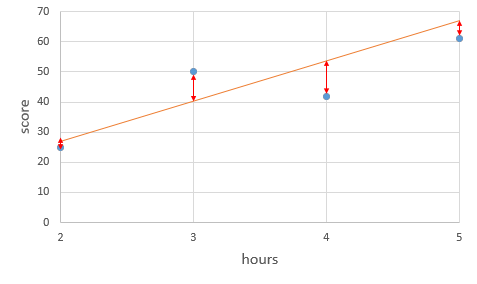

위의 그래프에 임의의 $w$의 값 13과 임의의 $b$의 값 1을 가진 직선을 그렸습니다. 임의로 그린 직선으로 정답이 아닙니다. 이제 이 직선으로부터 서서히 $w$와 $b$의 값을 바꾸면서 정답인 직선을 찾아내야 합니다.


사실 $y$와 $x$의 관계를 가장 잘 나타내는 직선을 그린다는 것은 위의 그림에서 모든 점들과 위치적으로 가장 가까운 직선을 그린다는 것과 같습니다. 이제 오차(error)를 정의하겠습니다. 오차는 주어진 데이터에서 각 $x$에서의 실제값 $y$와 위의 직선에서 예측하고 있는 $H(x)$값의 차이를 말합니다. 즉, 위의 그림에서 ↕는 각 점에서의 오차의 크기를 보여줍니다. 오차를 줄여가면서 $w$
와 $b$의 값을 찾아내기 위해서는 전체 오차의 크기를 구해야 합니다.

오차의 크기를 측정하기 위한 가장 기본적인 방법은 각 오차를 모두 더하는 방법이 있습니다. 위의 $y = {13x + 1}$ 직선이 예측한 예측값을 각각 실제값으로부터 오차를 계산하여 표를 만들어보면 아래와 같습니다.

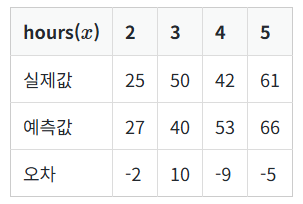

그런데, 수식적으로 단순히 '오차 = 실제값 - 예측값' 이라고 정의한 후에 모든 오차를 더하면 음수 오차도 있고, 양수 오차도 있으므로 오차의 절대적인 크기를 구할 수가 없습니다. 그래서 모든 오차를 제곱하여 더하는 방법을 사용합니다. 다시 말해 위의 그림에서의 모든 점과 직선 사이의 ↕ 거리를 제곱하고 모두 더합니다. 이를 수식으로 표현하면 아래와 같습니다. 단, 여기서 $n$은 갖고 있는 데이터의 개수를 의미합니다.

$$\sum_{i=1}^{n} \left[y^{(i)} - H(x^{(i)})\right]^2 = (-2)^{2} + 10^{2} + (-9)^{2} + (-5)^{2} = 210$$

이때 데이터의 개수인 $n$으로 나누면, 오차의 제곱합에 대한 평균을 구할 수 있는데 이를 **평균 제곱 오차(Mean Squered Error, MSE)** 라고 합니다. 수식은 아래와 같습니다.

$$\frac{1}{n} \sum_{i=1}^{n} \left[y^{(i)} - H(x^{(i)})\right]^2 = 210 / 4 = 52.5$$

$y = {13x + 1}$의 예측값과 실제값의 평균 제곱 오차의 값은 52.5입니다. 평균 제곱 오차의 값을 최소값으로 만드는 $w$와 $b$를 찾아내는 것이 정답인 직선을 찾아내는 일입니다. 평균 제곱 오차를 
$w$와 $b$에 의한 비용 함수(Cost function)로 재정의해보면 다음과 같습니다.

$$cost(w, b) = \frac{1}{n} \sum_{i=1}^{n} \left[y^{(i)} - H(x^{(i)})\right]^2$$

모든 점들과의 오차가 클 수록 평균 제곱 오차는 커지며, 오차가 작아질 수록 평균 제곱 오차는 작아집니다. 그러므로 이 평균 최소 오차. 즉, $Cost(w, b)$를 최소가 되게 만드는 $w$와 $b$를 구하면 결과적으로 $y$와 $x$의 관계를 가장 잘 나타내는 직선을 그릴 수 있습니다.

$$w, b → minimize\ cost(w, b)$$

### **4. 옵티마이저(Optimizer) : 경사하강법(Gradient Descent)**

선형 회귀를 포함한 수많은 머신 러닝, 딥 러닝의 학습은 결국 비용 함수를 최소화하는 매개 변수인 
와 
을 찾기 위한 작업을 수행합니다. 이때 사용되는 알고리즘을 **옵티마이저(Optimizer)** 또는 최**적화 알고리즘** 이라고 부릅니다.

그리고 이 옵티마이저를 통해 적절한 $w$와 $b$를 찾아내는 과정을 머신 러닝에서 훈련(training) 또는 학습(learning)이라고 부릅니다. 여기서는 가장 기본적인 옵티마이저 알고리즘인 경사 하강법(Gradient Descent)에 대해서 배웁니다.

경사 하강법을 이해하기 위해서 cost와 기울기 $w$와의 관계를 이해해보겠습니다. $w$는 머신 러닝 용어로는 가중치라고 불리지만, 직선의 방정식 관점에서 보면 직선의 기울기를 의미하고 있습니다. 아래의 그래프는 기울기 $w$가 지나치게 높거나, 낮을 때 어떻게 오차가 커지는 모습을 보여줍니다.

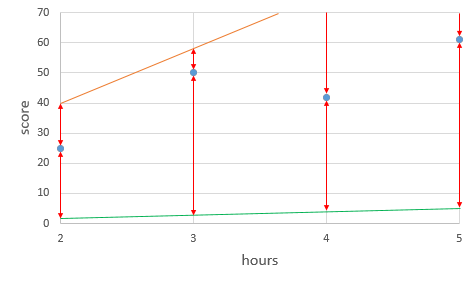

위의 그림에서 주황색선은 기울기 $w$가 20일 때, 초록색선은 기울기 $w$가 1일 때를 보여줍니다. 각각 $y = {20x}$, $y = x$에 해당되는 직선입니다. ↕는 각 점에서의 실제값과 두 직선의 예측값과의 오차를 보여줍니다. 이는 앞서 예측에 사용했던 $y = {13x + 1}$ 직선보다 확연히 큰 오차값들입니다. 즉, 기울기가 지나치게 크면 실제값과 예측값의 오차가 커지고, 기울기가 지나치게 작아도 실제값과 예측값의 오차가 커집니다. 사실 $b$ 또한 마찬가지인데 $b$가 지나치게 크거나 작으면 오차가 커집니다.

설명의 편의를 위해 편향 $b$가 없이 단순히 가중치 $w$만을 사용한 $y=wx$라는 가설 $H(x)$를 가지고, 경사 하강법을 수행한다고 해보겠습니다. 비용 함수의 값 $cost(w)$는 cost라고 줄여서 표현해보겠습니다. 이에 따라 $w$와 cost의 관계를 그래프로 표현하면 다음과 같습니다.  
  
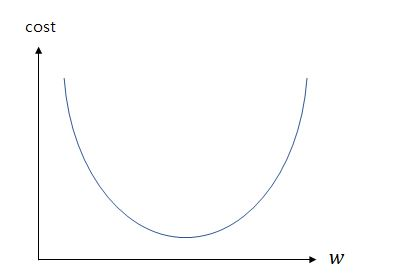

기울기 $w$가 무한대로 커지면 커질 수록 cost의 값 또한 무한대로 커지고, 반대로 기울기 $w$가 무한대로 작아져도 cost의 값은 무한대로 커집니다. 위의 그래프에서 cost가 가장 작을 때는 볼록한 부분의 맨 아래 부분입니다. 기계가 해야할 일은 cost가 가장 최소값을 가지게 하는 $w$를 찾는 일이므로, 볼록한 부분의 맨 아래 부분의 $w$의 값을 찾아야 합니다.

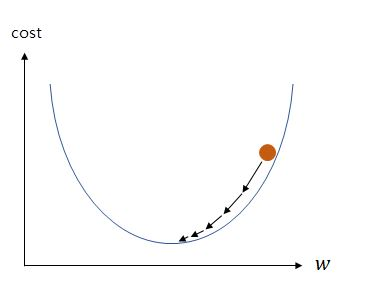

기계는 임의의 랜덤값 $w$값을 정한 뒤에, 맨 아래의 볼록한 부분을 향해 점차 $w$의 값을 수정해나갑니다. 위의 그림은 $w$값이 점차 수정되는 과정을 보여줍니다. 그리고 이를 가능하게 하는 것이 경사 하강법(Gradient Descent)입니다. 이를 이해하기 위해서는 고등학교 수학 과정인 미분을 이해해야 합니다. 경사 하강법은 미분을 배우게 되면 가장 처음 배우게 되는 개념인 한 점에서의 순간 변화율 또는 다른 표현으로는 접선에서의 기울기의 개념을 사용합니다.

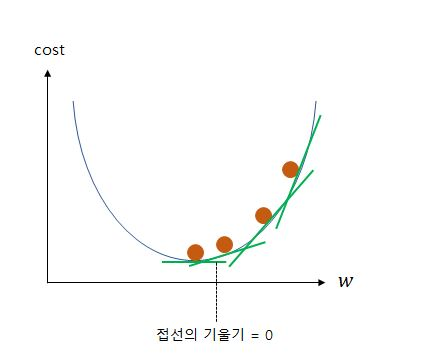

위의 그림에서 초록색 선은 $w$가 임의의 값을 가지게 되는 네 가지의 경우에 대해서, 그래프 상으로 접선의 기울기를 보여줍니다. 주목할 것은 맨 아래의 볼록한 부분으로 갈수록 접선의 기울기가 점차 작아진다는 점입니다. 그리고 맨 아래의 볼록한 부분에서는 결국 접선의 기울기가 0이 됩니다. 그래프 상으로는 초록색 화살표가 수평이 되는 지점입니다.


즉, cost가 최소화가 되는 지점은 접선의 기울기가 0이 되는 지점이며, 또한 미분값이 0이 되는 지점입니다. 경사 하강법의 아이디어는 비용 함수(Cost function)를 미분하여 현재 $w$에서의 접선의 기울기를 구하고, 접선의 기울기가 낮은 방향으로 $w$의 값을 변경하고 다시 미분하고 이 과정을 접선의 기울기가 0인 곳을 향해 $w$의 값을 변경하는 작업을 반복하는 것에 있습니다.

비용 함수(Cost function)는 아래와 같았습니다.

$$cost(w, b) = \frac{1}{n} \sum_{i=1}^{n} \left[y^{(i)} - H(x^{(i)})\right]^2$$

이제 비용(cost)를 최소화하는 $w$를 구하기 위해 $w$를 업데이트하는 식은 다음과 같습니다. 이를 접선의 기울기가 0이 될 때까지 반복합니다.

$$w := w - α\frac{∂}{∂w}cost(w)$$
 

위의 식은 현재 $w$에서의 접선의 기울기와 $α$와 곱한 값을 현재 $w$에서 빼서 새로운 $w$의 값으로 한다는 것을 의미합니다. $α$는 여기서 **학습률(learning rate)** 이라고 하는데, 우선 $α$는 생각하지 않고 현재 $w$에서 현재 $w$에서의 접선의 기울기를 빼는 행위가 어떤 의미가 있는지 알아보겠습니다.

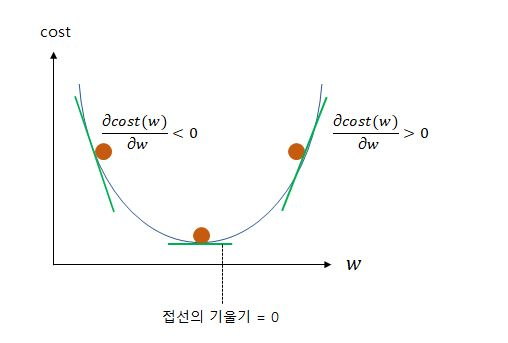

위의 그림은 접선의 기울기가 음수일 때, 0일때, 양수일 때를 보여줍니다. 접선의 기울기가 음수일 때의 수식은 아래와 같이 표현할 수 있습니다.

$$w := w - α(\text{음수 기울기})$$


기울기가 음수면 '음수를 빼는 것'은 곧 '해당 값을 양수로 바꾸고 더하는 것'과 같습니다. (가령, 어떤 수에서 -2를 뺀다는 것은 해당 숫자에 2를 더하는 것과 같습니다.) 결국 음수 기울기를 빼면 $w$의 값이 증가하게 되는데 이는 결과적으로 접선의 기울기가 0인 방향으로 $w$의 값이 조정됩니다. 만약, 접선의 기울기가 양수라면 위의 수식은 아래와 같이 표현할 수 있습니다.

$$w := w - α(\text{양수 기울기})$$




기울기가 양수면 $w$의 값이 감소하게 되는데 이는 결과적으로 기울기가 0인 방향으로 $w$의 값이 조정됩니다. 결국, 아래의 수식은 접선의 기울기가 음수거나, 양수일 때 모두 접선의 기울기가 0인 방향으로 $w$의 값을 조정합니다.

 $$w := w - α\frac{∂}{∂w}cost(w)$$

그렇다면 여기서 학습률(learning rate)이라고 말하는 $α$는 어떤 의미를 가질까요? 학습률 $α$은  $w$의 값을 변경할 때, 얼마나 크게 변경할지를 결정하며 0과 1사이의 값을 가지도록 합니다. 예를 들어서 0.01이 될 수 있겠습니다. 학습률은 $α$를 그래프의 한 점으로보고 접선의 기울기가 0일 때까지 경사를 따라 내려간다는 관점에서는 얼마나 큰 폭으로 이동할지를 결정합니다. 직관적으로 생각하기에 학습률 $α$의 값을 무작정 크게 하면 접선의 기울기가 최소값이 되는 $w$를 빠르게 찾을 수 있을 것같지만 그렇지 않습니다.

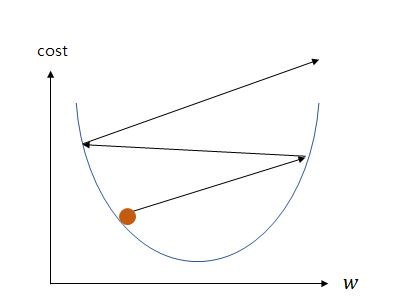

위의 그림은 학습률 $α$가 지나치게 높은 값을 가질 때, 접선의 기울기가 0이 되는 $w$를 찾아가는 것이 아니라 $cost$의 값이 발산하는 상황을 보여줍니다. 반대로 학습률 $α$가 지나치게 낮은 값을 가지면 학습 속도가 느려지므로 적당한 $α$의 값을 찾아내는 것도 중요합니다. 지금까지는 $b$는 배제시키고 최적의 $w$를 찾아내는 것에만 초점을 맞추어 경사 하강법의 원리에 대해서 배웠는데, 실제 경사 하강법은 $w$와 $b$에 대해서 동시에 경사 하강법을 수행하면서 최적의 $w$와 $b$의 값을 찾아갑니다.

정리하자면 가설, 비용 함수, 옵티마이저는 머신 러닝 분야에서 사용되는 포괄적 개념입니다. 풀고자하는 각 문제에 따라 가설, 비용 함수, 옵티마이저는 전부 다를 수 있으며 선형 회귀에 가장 적합한 비용 함수와 옵티마이저가 알려져있는데 이번 챕터에서 언급된 MSE와 경사 하강법이 각각 이에 해당됩니다.



마지막 편집일시 : 2023년 7월 4일 10:09 오후